In [1]:
import pandas as pd
import numpy as np
import keras
from keras.models import *
from keras.layers import Dense, Activation, Dropout, LSTM, Input
import tensorflow as tf
from tensorboardX import SummaryWriter
from datetime import datetime
from packaging import version

In [ ]:
1. MNIST(Modified National Institute of Standards and Technology database)
 0~9까지의 숫자를 사람들이 손으로 직접 쓴 손글씨를 이미지화 한 데이터 셋
    
2. fashion mnist : 의류 분류 데이터 셋

In [3]:
# 1. 데이터를 로드하자
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# C:\Users\USER\.keras\datasets\fashion-mnist

4423680/4422102 [==============================] - 2s 0us/step


In [5]:
# 2. 로드된 데이터에 담을 속성을 지정한다.
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', ' Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
# 3. 값의 범위를 0~255 까지로 지정된 이미지를 조정한다
# data를 255로 나누게 되면 0~1까지의 실수값은 전환된다.
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
28*28로 이루어진 배열 데이터를 Flatten을 사용해서 1차원의 값(784개)로 변형하고,
relu 활성화 함수로 이루어진 128개의 노드 신경망을 만들어서 계산하고,
최종 10개의 레이블을 가진 값으로 출력레이어를 생성하자
output layer는 0~9값의 확률

In [7]:
# 4. 모델 구성
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),   # 2차원 값을 1차원 배열의 값으로 변경
    keras.layers.Dense(128, activation = 'relu'),   # relu활성화 함수를 사용해서 128개의 신경망 층을 생성
    keras.layers.Dense(10, activation = 'softmax')   # 10개의 레이블 값을 가진 output layer, softmax 확률추출
])

In [ ]:
컴파일 : 옵티마이저 adam / 손실함수 sparse_categorical_crossentropy를 사용해서 컴파일
         metrics = accuracy를 지표로 삼는다

In [8]:
# 5. 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
# 6. 데이터 훈련단계 : fit() 학습 이미지 데이터, 레이블된 데이터 5번 반복 학습
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 21s 10ms/step - loss: 0.6112 - accuracy: 0.7886
Epoch 2/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.3848 - accuracy: 0.8610
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3401 - accuracy: 0.8750
Epoch 4/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3151 - accuracy: 0.8838
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2916 - accuracy: 0.8939


In [10]:
# 7. 모델평가
# 학습모델에 test데이터셋을 넣어서 train과 test의 성능차이를 측정해본다
# train에 over-fitting이 될 수 있기 때문에 결과는 test 데이터를 넣은 evaluate()를 사용해서 평가한다.
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('test accuracy :', test_acc)

# 테스트 데이터를 모델에 넣었을때 87 ~ 88%의 정확도를 보여준다

313/313 - 1s - loss: 0.3493 - accuracy: 0.8743
test accuracy : 0.8743000030517578


In [12]:
# 8. 분류 예측하기 모델을 성공적으로 만들었다고 판단. 실제 각각의 데이터를 호출한 후 분류를 어떻게 하고 있는지 확인한다.
# 0번째 데이터의 레이블별 예측 결과와 실제 데이터와 예측한 데이터를 호출한다.
# predictions는 해당 데이터의 모든 레이블값의 확률을 출력하기 때문에 argmax를 사용하여 가장 높은 index값을 리턴한다.
# 8. 예측 생성하기
predictions = model.predict(test_images)   # 예측 값 생성
print(predictions[0])
print(class_names[test_labels[0]], '===>', class_names[np.argmax(predictions[0])])

[7.2367234e-06 4.4208460e-07 2.4743514e-07 6.2740114e-06 1.6896758e-08
 2.0497335e-02 1.7634092e-06 5.0447226e-02 6.8238846e-06 9.2903262e-01]
Ankle boot ===> Ankle boot


In [13]:
# 100개의 데이터를 호출해서 결과의 예측률을 보자
for i in range(100):
    print(class_names[test_labels[i]], '===>', class_names[np.argmax(predictions[i])])

Ankle boot ===> Ankle boot
Pullover ===> Pullover
Trouser ===> Trouser
Trouser ===> Trouser
Shirt ===> Shirt
Trouser ===> Trouser
 Coat ===>  Coat
Shirt ===> Shirt
Sandal ===> Sandal
Sneaker ===> Sneaker
 Coat ===>  Coat
Sandal ===> Sandal
Sneaker ===> Sneaker
Dress ===> Dress
 Coat ===>  Coat
Trouser ===> Trouser
Pullover ===> Pullover
 Coat ===> Pullover
Bag ===> Bag
T-shirt/top ===> T-shirt/top
Pullover ===> Pullover
Sandal ===> Sandal
Sneaker ===> Sneaker
Ankle boot ===> Ankle boot
Trouser ===> Trouser
 Coat ===> Pullover
Shirt ===> Shirt
T-shirt/top ===> T-shirt/top
Ankle boot ===> Ankle boot
Dress ===>  Coat
Bag ===> Bag
Bag ===> Bag
Dress ===> Dress
Dress ===> Dress
Bag ===> Bag
T-shirt/top ===> T-shirt/top
Sneaker ===> Sneaker
Sandal ===> Sandal
Sneaker ===> Sneaker
Ankle boot ===> Ankle boot
Shirt ===> T-shirt/top
Trouser ===> Trouser
Dress ===> Shirt
Sneaker ===> Sneaker
Shirt ===> Shirt
Sneaker ===> Sneaker
Pullover ===> Pullover
Trouser ===> Trouser
Pullover ===>  Coat
Pull

In [ ]:
1. 퍼셉트론 : 신경세포를 뉴런이 발견한 것
입력신호 : x
출력값 : y
가중치 : w
임계값 : threshold
    +
편향 : b

- 각 입력값은 각각의 가중치가 존재하는데 가중치값이 클수록 입력값에 영향을 준다
- 각 입력값과 가중치 곱의 전체 합이 임계치를 넘으면 출력 신호로 1을 내보낸다. 그렇지 않은 경우 0을 내보낸다.(계단함수)
  y = x1*w1 + x2*w2 + xn*wn ...
- 편향 b라고 하고 입력값과 같이 연동된다. : 최적의 값을 찾는 역할
    
2. 활성화 함수 : 데이터 폭을 조절, 데이터폭을 정의하도록 설정하는 것을 목적
 - 계단함수는 0,1로만 리턴되기 때문에 예측, 손실율이 낮다. 분류목적
 - 시그모이드 함수 = 이진 분류 로지스틱 회귀 (2개중에 하나선택)
 - 소프트 맥스 함수 = 3개 이상중에 하나를 골라서 출력 = 다중 클래스 분류

3. 단층 퍼셉트론 = 분류 = 선형 AND, OR, NOT = 직선

4. 다중 퍼셉트론 = 비선형 영역 분류 XOR = 곡선
    = Deep Neural Network = DNN = 심층 신경망 = 은닉층 2개 이상인 신경망
    
5. 퍼셉트론은 히든레이어를 만들어서 가중치를 찾아 결과를 내는 결과론
   가중치 -> 자동화 -> 머신러닝(학습:training) + (손실+옵티마이저) = 딥러닝

6. 심층 신경망을 학습시킨다 = Deep learning

7. 인공신경망 입력 방향에 따른 분류
   Feed-Forward NN : 순방향 신경망 -> 입력 데이터와 출력 데이터가 한 방향으로 이루어지는 것
   Recurrent NN(RNN) : 은닉층의 출력값을 출력으로 값을 보내는 동시에 출력값이 다시 은닉층의 입력값으로 회전하면서 연산되는 것
    
   Fully-connected layer : FC = Dense = 밀집층
    
8. 순전파(Foward Propagation) : 입력값 -> 은닉층 -> 출력값(예측값 = 손실함수)
  손실함수의 값을 최소화하는 가중치와 편향을 찾아가는 것이 딥러닝의 학습과정이다.
  손실함수의 종류
    - MSE(Mean Squared Error) : 오차 제곱 평균 = 연속형 변수값을 예측할 때 사용
    - Cross-Entropy = binary_crossentropy
    - 다중분류 = categorical_crossentropy
    
9. 옵티마이저(optimizer) : 손실함수의 값을 줄여가면서 학습하는 방법
  - SGD(Stochastic Gradient Descent : 확률적 경사 하강법) : 랜덤으로 선택한 하나의 데이터만 계산하는 방법
    tf.keras.optimizers.SGD(
        learning_rate=0.01, momentum=0.0, nesterov=False, name='SGD', **kwargs
    )
    momentum(모멘텀) - 경사 하강법에서 기울기에 대한 접선을 비율만큼 지정
  
  - Adagrad : 동일한 데이터가 매개변수로 구현될 때 사용된다.
    RMsprop    
  - Adam(Adagrad + RMsprop) : 동일한 매개변수 값이 많거나 학습에 대한 변화가 없을 경우 사용된다.
    
10. batch_size = len(train_x) : 가중치 등의 매개변수의 값을 조정하기 위해 사용하는 데이터 량
     = 배치 경사 하강법(batch gradient descent) : 오차를 구할 때 전체 데이터를 대상으로 한다.
            
    batch_size = 32 (미니 매치 경사 하강법 mini-batch gradient descent)

11. over-fitting : 학습데이터에 모델이 과적합한 현상
    과적합하면 무슨일이 벌어지나요? : 정확도는 너무 높다, 새로운데이터(검증데이터)가 들어올경우 
    테스트 데이터에 대해 동작을 제대로 하지 않는다
    해결방법 : 데이터를 늘린다. 은닉층을 줄인다, 가중치 규제 적용한다, 신경망을 줄이자(Dropout) tf.keras.layers.Dropout
        
12. 기울기 자르기 : clipnorm = 임계값을 넘을 경우 기울기를 자른다. 임계치만큼 크기 감소 = RNN에서 사용
     tf.keras.optimizers.Adam(
         learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False, name='Adam', **kwargs
     )
    ex) optimizers.Adam(clipnorm=1.)
    
13. 유형에 따른 손실 함수와  |  출력층의 활성함수
  1) 회귀문제 : mean_squared_error
  2) 다중클래스 분류 : categorical_crossentropy  |  소프트맥스 => 로이트 뉴스 분류
  3) 다중클래스 분류 : sparse_categorical_crossentropy (one-hot X)  |  소프트 맥스 => 
  4) 이진 분류 : binary_crossentropy  |  시그모이드 => 스팸메일 분류, IMDB 리뷰

In [ ]:
# 계단함수
def step(val):
    if (val >= 0):
        return 1
    return 0

In [ ]:
입력값이 두개 들어왔을 경우 둘다 a,b 1,1
  x1, x2, y
  0   0   0
  0   1   0
  1   0   0
  1   1   1

In [ ]:
def my_and(x1, x2):
    w1 = 0.5
    w2 = 0.5
    b = -0.7
    res = x1*w1 + x2*w2 + b
    if res >= 0:
        return 1
    return 0

In [ ]:
def my_or(x1, x2):
    w1 = 0.5
    w2 = 0.5
    b = -0.7
    res = x1*w1 + x2*w2 + b
    if res <= 0:
        return 0
    return 1

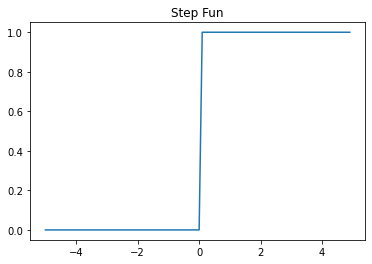

In [15]:
# 01. 활성화 step 함수
import numpy as np
import matplotlib.pyplot as plt

def step(x):
    return np.array(x > 0, dtype=np.int)

x = np.arange(-5.0, 5.0, 0.1)
y = step(x)

plt.title('Step Fun')
plt.plot(x,y)
plt.show()

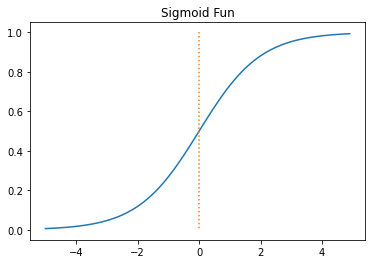

In [18]:
# 02. 시그모이드 함수 : 미분을 해서 기울기(gradient)를 구할 때 발생
# 가중치 -> 자동화 -> 머신러닝(학습:training) + (손실+옵티마이저) = 딥러닝
# 입력 데이터 -> 연산 -> (출력 + 손실)
# 손실함수(loss function) = 예측값과 실제값의 오차
# 손실함수는 미분을 통해서 기울기를 구하고 이를 통해서 역전파를 수행한다.

def sigmoid(x):
    return 1 / (1+np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x,y)
plt.title('Sigmoid Fun')
plt.plot([0,0],[1.0,0.0],':')
plt.show()
# 결과를 보면 기울기가 원만해지는 값들이 출력값 0,1 에 가까워 지는 것을 볼 수 있다.
# 기울기 소실(Vanishing Gradient)
# 은닉층의 개수가 많을 때 0에 가까운 기울기가 계속 곱해진다. 
# 그렇게 되면 처리되는 연산에 처음부분으로 갈수록 기울기를 얻어낼수가 없다.

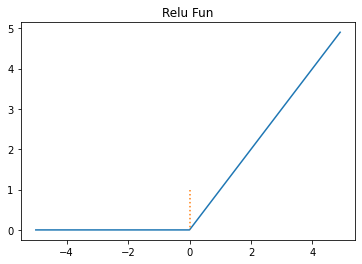

In [19]:
# 활성화 함수 : 렐루(Relu)  f(x) = max(0,x)

def Relu(x):
    return np.maximum(0,x)  # 음수를 입력하면 0을 출력, 양수를 입력하면 양수값 리턴

x = np.arange(-5.0, 5.0, 0.1)
y = Relu(x)

plt.plot(x,y)
plt.title('Relu Fun')
plt.plot([0,0],[1.0,0.0],':')
plt.show()

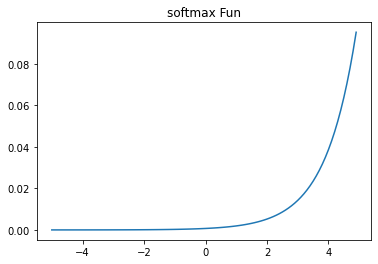

In [20]:
# 활성화 함수 : softmax()   ---> 출력층  다중 클래스 분류

x = np.arange(-5.0, 5.0, 0.1)
y = np.exp(x) / np.sum(np.exp(x))

plt.plot(x,y)
plt.title('softmax Fun')
plt.show()

In [23]:
from tensorflow.keras.layers import Dense
import tensorflow as tf

model = tf.keras.Sequential()   # 순전파
model.add(Dense(4, input_dim=2, activation = 'relu'))  # 입력층 2, 은닉층 4, 활성화함수 relu
model.add(Dense(4, activation = 'relu'))  # 은닉층 4, 활성화함수 relu
model.add(Dense(1, activation = 'softmax'))   # 출력층 1, 활성화함수 softmax

In [ ]:
model.add(Dense(4, input_dim=2, activation = 'relu'))
  = 입력 행렬(X)의 크기 1*2   출력 4  Y의 크기는 1*4
 y = x1*w1 + x2*w2 + xn*wn  + b

 X m*n * W n*j + B m*j = Y m*j
 X 1*2 + W 2*4 + B 1*4 = Y 1*4

model.add(Dense(4, activation = 'relu'))
 X 1*4 + W 4*4 + B 1*4 = Y 1*4
    
model.add(Dense(1, activation = 'softmax'))
 X 1*4 + W 4*1 + B 1*1 = Y 1*1